# Plotscript for RVE charts

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

voxelsize = 70
df = pd.read_excel('results_rve_analysis.xls')
df['section length'] = df['cut'] * voxelsize / 1000
df['section volume'] = np.square((df['cut'] * voxelsize /1000)) * 44.94
df.head()

,x,y,va_pore_orig,va_cb_orig,va_am_orig,pore,carbon black,active material,active surface,step,cut,section length,section volume
0,1,1,0.238938,0.063975,0.697087,0.238860,0.064057,0.697083,0.578741,86,100,7.0,2202.06
1,1,87,0.211555,0.071033,0.717411,0.211446,0.071160,0.717393,0.499420,86,100,7.0,2202.06
2,1,173,0.270659,0.062159,0.667182,0.270560,0.062268,0.667172,0.579400,86,100,7.0,2202.06
3,1,259,0.277753,0.056144,0.666103,0.277700,0.056203,0.666097,0.708920,86,100,7.0,2202.06
4,1,345,0.324402,0.110179,0.565419,0.324214,0.110372,0.565414,0.618506,86,100,7.0,2202.06


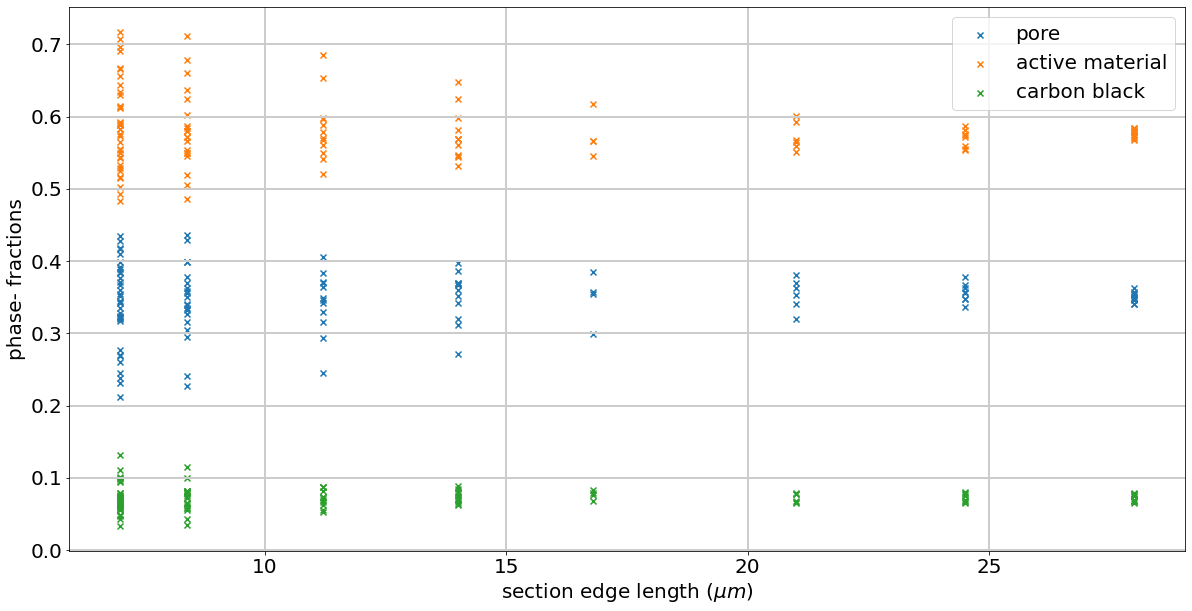

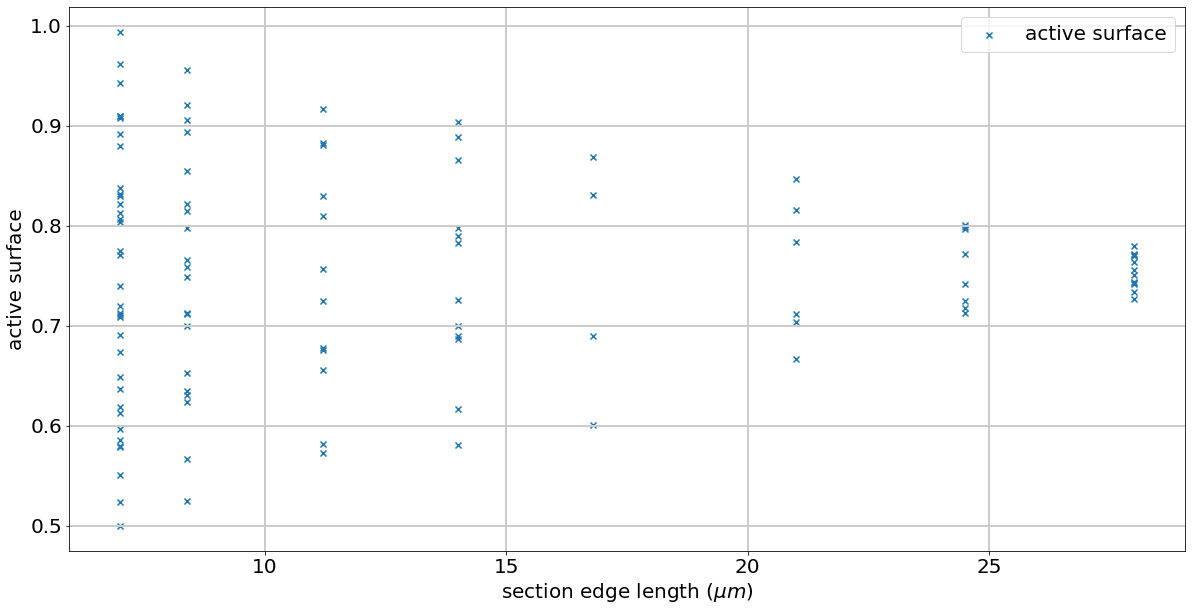

In [2]:
def make_scatter_plot (df_ir, x_axis_label, y_axis_label):
    '''
    takes df as input and plots first column as x-axis and the resulting columns on top of each other
    '''
    save_name = 'output/' + x_axis_label + ' versus ' + y_axis_label #name to be saved later on
    plt.figure(figsize = (20, 10))#figure size
    
    headers = df_ir.columns.values
    x = headers[0]#set as x-axis
    for i in enumerate(headers):
        if i[0] > 0:
            c = i[1]
            plt.scatter(df_ir[x], df_ir[c], label = c, marker = 'x')
    label_size = 20
    
    plt.grid(True, color='0.8', linestyle='-', linewidth=2)
    plt.xticks(fontsize=label_size)
    plt.yticks(fontsize=label_size)
    plt.xlabel(x_axis_label, fontsize=label_size)
    plt.ylabel(y_axis_label, fontsize=label_size)
    
    plt.legend(df_ir.columns.values[1:], loc='upper right', fontsize=label_size)
    #plt.savefig(save_name)
    plt.show()
    return

def sort_dataframe(df, x_values, y_values):
    '''
    df = rawdata
    x_values = name of column 2be used as x-axis
    y_values = array with column names 2be plotted in the end
    '''
    df_new = pd.DataFrame()
    df_new[x_values] = df[x_values]
    for val in y_values:
        df_new[val] = df[val]
    return df_new

def sort_and_plot(df, x_label, y_labels, x_axis_name, y_axis_name):
    '''
    just make the above operations easier
    '''
    df_mat_fracs = sort_dataframe(df, x_label, y_labels)
    make_scatter_plot(df_mat_fracs, x_axis_name, y_axis_name)
    return

#plot1 - phase fractions vs volume element surface
mat_fracs = ['pore', 'active material', 'carbon black']
#sort_and_plot(df, 'surface', mat_fracs, 'section surface ($\mu m^2$)', 'phase- fractions')

#plot2 - phase fractions vs section edge length
sort_and_plot(df, 'section length', mat_fracs, 'section edge length ($\mu m$)', 'phase- fractions')

#plot3 - active surface vs section edge length
sort_and_plot(df, 'section length', ['active surface'], 'section edge length ($\mu m$)', 'active surface')

# Some more statistical analysis 
### looks at the mean + standard deviation of each phase component + active surface

In [25]:
def create_excel(df,directory):
    file_path = 'output/' + directory + '.xlsx'
    writer = pd.ExcelWriter(file_path, engine = 'xlsxwriter')
    df.to_excel(writer, sheet_name = 'Sheet_1', index = True)
    writer.save()
    return

def generate_statistics(df_temp, filters, param):
    '''
    loop through cut- sizes and calculate std, and mean value for each
    df_temp = filtered df that contains the parameters and a column called voxels (=x_axis)
    filters = ['active material ']
    '''
    size = []
    std = []
    mean = []
    
    #loop through cut values and perform statistical analysis for each value
    for filter_i in filters:
        df_cut = df_temp.filter(like = str(filter_i), axis = 0) #filter for CUT values
        
        std.append("{:.2%}".format(df_cut[param].std()))
        mean.append("{:.2%}".format(df_cut[param].mean()))
        
        size.append(filter_i)

    df_results = pd.DataFrame()
    df_results['section length'] = size
    df_results['mean value'] = mean
    df_results['standard deviation'] = std
    return df_results


def filter_variable(df, x_label, y_labels):
    '''
    set given axis to x-axis and return sorted/filtered dataframe
    df = rawdata dataframe 
    x_label = label to be set as x_axis
    x_ylabels = desired entries (pore, cb, am)
    '''
    df_temp = sort_dataframe(df, x_label, y_labels) #just return pore, am, cb
    filters = np.unique(list(df_temp[x_label])) #find unique values in cut - to further sort the dfs
    df_temp = df_temp.set_index(x_label) #set cut as x-label
    
    for y in y_labels:
        
        df_results = generate_statistics(df_temp, filters, y)
        create_excel(df_results, y)
        print('\n' + y + ':')
        print(df_results)

    return 


params_statistics = ['pore', 'active material', 'carbon black', 'active surface']
filter_variable(df, 'section length', params_statistics)


pore:
   section length mean value standard deviation
0             7.0     33.91%              5.94%
1             8.4     34.50%              5.31%
2            11.2     34.30%              4.33%
3            14.0     35.13%              3.49%
4            16.8     34.94%              3.58%
5            21.0     35.45%              2.14%
6            24.5     35.69%              1.28%
7            28.0     35.05%              0.65%

active material:
   section length mean value standard deviation
0             7.0     58.96%              6.32%
1             8.4     58.35%              5.67%
2            11.2     58.44%              4.65%
3            14.0     57.42%              3.44%
4            16.8     57.38%              3.02%
5            21.0     57.30%              1.95%
6            24.5     57.04%              1.26%
7            28.0     57.71%              0.56%

carbon black:
   section length mean value standard deviation
0             7.0      7.13%              2.03%
